Scikit Learn

An End To end scikit-learn workflow
Getting the data ready
choosing the right estimator and algorithm of our problems
fit the model and use it to make predictions on data
Evaluating a model
Improve a model
Save and load a trained model
putting it all together
    

# An End to End scikit-learn workflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
#create x (features matrix)
X=heart_disease.drop("target",axis=1)

#create y (label)
Y=heart_disease["target"]

In [3]:
#choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

#we will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
#fit the model tto the training data
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [5]:
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [6]:
#make a prediction 
import numpy as np

In [7]:
# Y_label=clf.predict(np.array([0,2,3,4]))

In [8]:
ypreds=clf.predict(X_test)

In [9]:
ypreds

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [10]:
Y_test

289    0
149    1
154    1
175    0
118    1
      ..
152    1
300    0
91     1
29     1
169    0
Name: target, Length: 61, dtype: int64

In [11]:
#Evaluating the model how well it predict 
clf.score(X_train,Y_train)

1.0

In [12]:
clf.score(X_test,Y_test)

0.7868852459016393

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [14]:
print(classification_report(Y_test,ypreds))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [15]:
print(confusion_matrix(Y_test,ypreds))

[[21  7]
 [ 6 27]]


In [16]:
print(accuracy_score(Y_test,ypreds))

0.7868852459016393


In [17]:
#improve a model
#Improving by tuning various hyperparameters
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print("Model accuracy on test set")
    print(f"{clf.score(X_test,Y_test)*100}%")
    print("")

Trying model with 10 estimators
Model accuracy on test set
77.04918032786885%

Trying model with 20 estimators
Model accuracy on test set
83.60655737704919%

Trying model with 30 estimators
Model accuracy on test set
81.9672131147541%

Trying model with 40 estimators
Model accuracy on test set
83.60655737704919%

Trying model with 50 estimators
Model accuracy on test set
81.9672131147541%

Trying model with 60 estimators
Model accuracy on test set
80.32786885245902%

Trying model with 70 estimators
Model accuracy on test set
81.9672131147541%

Trying model with 80 estimators
Model accuracy on test set
80.32786885245902%

Trying model with 90 estimators
Model accuracy on test set
78.68852459016394%



In [18]:
#save a model and load it 
import pickle

pickle.dump(clf,open("heart_disease_RandomForest_ModelOne.pkl","wb"))

In [19]:
#loading a saved model
loaded_model=pickle.load(open("heart_disease_RandomForest_ModelOne.pkl","rb"))
loaded_model.score(X_test,Y_test)

0.7868852459016393

# Getting our data ready to be used

# Three main things we have to do here -
1.Split the data into the features and labels (X=features and y=labels)
2.Filling also called imputing or disregarding missing values
3.Converting non-numericcal values to numerical values (also called feature encoding)

In [20]:
#features and labels
X=heart_disease.drop("target",axis=1)

In [21]:
y=heart_disease["target"]

In [22]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
#splitting the data into train and tests
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

# Making it all numerical

In [26]:
car_sales=pd.read_csv("car-sales-extended.csv")

In [27]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [28]:
len(car_sales)

1000

In [29]:
#splitting into x and y
X=car_sales.drop("Price",axis=1)

y=car_sales["Price"]


In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [31]:
# from sklearn.ensemble import RandomForestRegressor

# #getting the model
# model=RandomForestRegressor()

# #fitting the model
# model.fit(X_train,y_train)

# #checking model or running the model
# model.score(X_test,y_test)

# Turning the string into numbers

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],
                             remainder="passthrough")

transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

So what we did here was we converted the columns Make,Colour and Doors into
numbers through OneHotEncoder and remainder=passthrough means we left the
remaining columns except for Make,Colour and Doors as they were before !

In [33]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


# Now we have all numerical data,so lets refit the model and see if it works

In [34]:
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

In [35]:
from sklearn.ensemble import RandomForestRegressor

#getting the model
model=RandomForestRegressor()

#fitting the model
model.fit(X_train,y_train)

#checking model or running the model
model.score(X_test,y_test)

0.2330485230539474

# So What if there were some missing data ???
1.Fill them with some value (also known as imputation)
2.Remove the samples with missing data altogether

In [36]:
#lets work on missing data
csm=pd.read_csv("car-sales-extended-missing-data.csv")

In [37]:
csm

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [38]:
csm.isna()

,Make,Colour,Odometer (KM),Doors,Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,True,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [39]:
csm.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

# so lets take that data to a model

In [40]:
X_train,X_test,y_train,y_test=train_test_split(csm,y,test_size=0.2)

In [41]:
# from sklearn.ensemble import RandomForestRegressor

# #getting the model
# model=RandomForestRegressor()

# #fitting the model
# model.fit(X_train,y_train)

# #checking model or running the model
# model.score(X_test,y_test)

In [42]:
#splitting into x and y
X=csm.drop("Price",axis=1)

y=csm["Price"]

In [43]:
print("x")

x


In [44]:
csm

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [45]:
# from sklearn.ensemble import RandomForestRegressor

# #getting the model
# model=RandomForestRegressor()

# #fitting the model
# model.fit(X_train,y_train)

# #checking model or running the model
# model.score(X_test,y_test)

Lets ignore these errors for good and focus on filling missing datas

In [46]:
csm

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [47]:
csm

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [48]:
#lets work on missing data
carsm=pd.read_csv("car-sales-extended-missing-data.csv")

In [49]:
carsm.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [50]:
#filling the Make
carsm["Make"].fillna("missing",inplace=True)

#filling the Colour
carsm["Colour"].fillna("missing",inplace=True)

#filling the Doors
carsm["Doors"].fillna(4,inplace=True)



In [51]:
#filling the Odometer
carsm["Odometer (KM)"].fillna(carsm["Odometer (KM)"].mean(),inplace=True)

In [52]:
carsm.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

Remove rows with missing price value

In [53]:
carsm.dropna(inplace=True)

In [54]:
carsm.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [55]:
len(carsm)

950

In [56]:
#splitting into x and y
X=carsm.drop("Price",axis=1)

y=carsm["Price"]

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],
                             remainder="passthrough")

transformed_X=transformer.fit_transform(carsm)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

lets fill those missing values with scikit-learn

In [58]:
csm2=pd.read_csv("car-sales-extended-missing-data.csv")

In [59]:
csm2.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [60]:
csm2.dropna(subset=["Price"],inplace=True)
#dropping the rows with no labels

In [61]:
csm2.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [62]:
#filling missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [63]:
#fill categorical values with missing and numerical values with mean
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

#Define columns
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

#creating an imputer something that fills missing data
imputer=ColumnTransformer(
[
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

In [64]:
X=csm2.drop("Price",axis=1)
y=csm2["Price"]

In [65]:
#transform the data
filled_X=imputer.fit_transform(X)

In [66]:
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [67]:
csmFilled=pd.DataFrame(filled_X,columns=
                       ["Make","Colour","Doors","Odometer (KM)"])


In [68]:
csmFilled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [69]:
csmFilled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

# 2 . Choosing the Right estimator/algorithm for our problem

Note : Scikit-learn uses estimator as another term for machine learning model 
    or algorithm

Regression = Predicting a number ||
Classification = Predicting whether a given sample is one thing or another 

# Picking a machine learning model for a regression problem

In [70]:
from sklearn.datasets import load_boston
boston=load_boston()
boston

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [71]:
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


lets try the ridge regression model on this dataset


In [72]:
from sklearn.linear_model import Ridge

#setup random seed
np.random.seed(42)

#create the data
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

#splitting into train and tests
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Initializing and fitting a model
model=Ridge()
model.fit(X_train,y_train)

#checking the score on the test data
model.score(X_test,y_test)

0.6662221670168522

# Choosing an estimator for a classification problem

In [73]:
hd=pd.read_csv("heart-disease.csv")

In [74]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Trying the linear SVC

In [75]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X=hd.drop("target",axis=1)
y=hd["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=LinearSVC()
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

lets try again using RandomForestClassifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=hd.drop("target",axis=1)
y=hd["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.8524590163934426

TIPS 

If we have structured data (data in tables and dataframes) , use ensemble
methods   ||    If we have unstructured data , we gotta use deep learning 
and transfer learning

# MAKING PREDICTIONS WITH OUR TRAINED MODEL

2 ways to make predictions
1.predict()
2.predict_proba()

In [77]:
#Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [78]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

Comparing the predictions

In [79]:
y_preds=clf.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [80]:
clf.score(X_test,y_test)

0.8524590163934426

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

 Three different ways of checking the model accuracy we saw above

predict-proba

In [82]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [83]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

# Evaluating a machine learning model

In [84]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [85]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=hd.drop("target",axis=1)
y=hd["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.8524590163934426

# Evaluating a model using the scoring parameter

In [86]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=hd.drop("target",axis=1)
y=hd["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.8524590163934426

In [87]:
cross_val_score(clf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [88]:
cross_val_score(clf,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

Note : cv=5 is default.By default it splits into five and then check the score,
    but we can always comtrol the number of splits as cv=

And Note that the scoring parameter is set to none by default and we can also
change it 

In [89]:
scores=cross_val_score(clf,X,y,cv=5,scoring=None)

# Classification model evaluation metrics

In [90]:
scores

array([0.85245902, 0.8852459 , 0.81967213, 0.8       , 0.78333333])

In [91]:
# calculating the mean of the cross_val_score
np.mean(scores)

0.8281420765027322

In [92]:
print(f"Accuracy is {np.mean(scores)*100:.2f} % ")

Accuracy is 82.81 % 


In [93]:
print(f"Accuracy is {np.mean(scores)*100:.3f} % ")

Accuracy is 82.814 % 


# ROC CURVE (AUC)

AUC = Area Under Curve

ROC = Receiver Operating Characteristics

ROC curves are a comparision of a model's true positive rate (tpr) versus a 
model's false positive rate(fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [94]:
clf.score(X_test,y_test)

0.8524590163934426

In [95]:
from sklearn.metrics import roc_curve

clf.fit(X_train,y_train)

#making predictions with probabilities
y_probs=clf.predict_proba(X_test)

In [96]:
y_probs[:10]

array([[0.9 , 0.1 ],
       [0.31, 0.69],
       [0.45, 0.55],
       [0.85, 0.15],
       [0.21, 0.79],
       [0.2 , 0.8 ],
       [0.32, 0.68],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.49, 0.51]])

In [97]:
#getting the positive or the second one
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.1 , 0.69, 0.55, 0.15, 0.79, 0.8 , 0.68, 0.05, 0.02, 0.51])

In [98]:
#calculating fpr ,tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

In [99]:
#check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03448276, 0.03448276, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.27586207,
       0.44827586, 0.51724138, 0.55172414, 0.65517241, 0.72413793,
       0.82758621, 0.89655172, 1.        ])

In [100]:
#creating a function for plotting ROC curves
import matplotlib.pyplot as plt

def Plot_ROC(fpr,tpr):
    plt.plot(fpr,tpr,color="teal",label="ROC")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="guessing")
    
    #customizing the plot
    plt.xlabel("false positive rate(fpr)")
    plt.ylabel("true positive rate(tpr)")
    plt.title("Receiver Operating Characteristics Curve (roc)")
    plt.legend()
    plt.show()

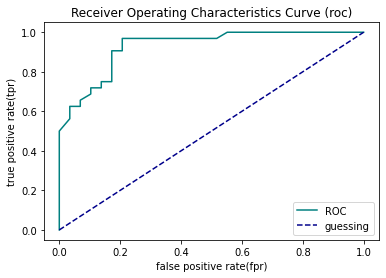

In [101]:
Plot_ROC(fpr,tpr)

In [102]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.927801724137931

In [103]:
#plot perfect roc curve and perfect auc score
fpr,tpr,thresholds=roc_curve(y_test,y_test)

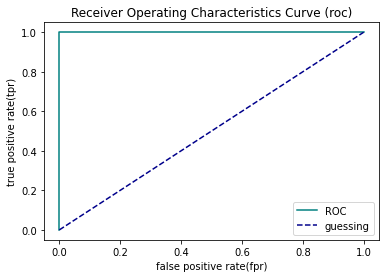

In [104]:
Plot_ROC(fpr,tpr)

In [105]:
#perfect auc score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_test)

1.0

# Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and
the actual labels it was supposed to predict.

It gives us an idea of where a model is getting confused.

In [106]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 3, 29]], dtype=int64)

In [107]:
pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],
                           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,3,29


In [108]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Regression Model Evaluation Metrics

* R^2 (r-squared or coefficient of determination)
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)

In [109]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [110]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=boston_df.drop("target",axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()

model.fit(X_train,y_train)

RandomForestRegressor()

In [111]:
model.score(X_test,y_test)

0.8654448653350507

In [113]:
from sklearn.metrics import r2_score

y_test_mean=np.full(len(y_test),y_test.mean())

In [114]:
y_test.mean()

21.488235294117644

In [115]:
r2_score(y_test,y_test_mean)

0.0

In [116]:
r2_score(y_test,y_test)

1.0

Mean Absolute Error

In [117]:
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(X_test)

mae=mean_absolute_error(y_test,y_preds)

mae

2.136382352941176

In [118]:
df=pd.DataFrame(data={"actual values":y_test,"predicted values":y_preds})

In [119]:
df

,actual values,predicted values
173,23.6,23.081
274,32.4,30.574
491,13.6,16.759
72,22.8,23.460
452,16.1,16.893
...,...,...
412,17.9,13.159
436,9.6,12.476
411,17.2,13.612
86,22.5,20.205


MAE is the average of the absolute differences between predictions and actual
values.It gives you an idea of how wrong your model predictions are.

Mean Squared Error (MSE)

In [120]:
from sklearn.metrics import mean_squared_error

y_preds=model.predict(X_test)

mse=mean_squared_error(y_test,y_preds)

mse

9.867437068627442

In [121]:
df=pd.DataFrame(data={"actual values":y_test,"predicted values":y_preds})

In [122]:
df.head()

,actual values,predicted values
173,23.6,23.081
274,32.4,30.574
491,13.6,16.759
72,22.8,23.460
452,16.1,16.893


# The Scoring Parameters 

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=hd.drop("target",axis=1)
y=hd["target"]

clf=RandomForestClassifier()

In [124]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,scoring=None)
np.mean(cv_acc)

0.8248087431693989

In [125]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,scoring="accuracy")
np.mean(cv_acc)

0.8248087431693989

In [126]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,scoring="precision")
np.mean(cv_acc)

0.8329547346025924

In [127]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,scoring="recall")
np.mean(cv_acc)

0.8545454545454545

In [128]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,scoring="f1")
np.mean(cv_acc)

0.8426854603423346

for the regression model

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=boston_df.drop("target",axis=1)
y=boston_df["target"]

clf=RandomForestRegressor()

In [130]:
np.random.seed(42)
cv_reg=cross_val_score(clf,X,y,scoring=None)
np.mean(cv_reg)

0.6243870737930857

In [131]:
np.random.seed(42)
cv_reg=cross_val_score(clf,X,y,scoring="r2")
np.mean(cv_reg)

0.6243870737930857

In [132]:
np.random.seed(42)
cv_reg=cross_val_score(clf,X,y,scoring="neg_mean_squared_error")
np.mean(cv_reg)

-21.261442856882137

In [133]:
np.random.seed(42)
cv_reg=cross_val_score(clf,X,y,scoring="neg_mean_absolute_error")
np.mean(cv_reg)

-3.0312352552902335

# Evaluation Metrics Functions

* Accuracy 
* Precision = gives idea of how many false positives are there
* Recall = gives idea of how many false negatives are there
* f1 = combination between precision and recall

In [136]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=hd.drop("target",axis=1)
y=hd["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

y_preds=clf.predict(X_test)

In [139]:
#Evaluating
print(f"Accuracy Score = {accuracy_score(y_test,y_preds)}")
print(f"Precision Score = {precision_score(y_test,y_preds)}")
print(f"Recall Score = {recall_score(y_test,y_preds)}")
print(f"f1 Score = {f1_score(y_test,y_preds)}")

Accuracy Score = 0.8524590163934426
Precision Score = 0.8484848484848485
Recall Score = 0.875
f1 Score = 0.8615384615384615


for regression

In [140]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=boston_df.drop("target",axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestRegressor()
clf.fit(X_train,y_train)

y_preds=clf.predict(X_test)

In [141]:
#Evaluating
print(f"r2 Score = {r2_score(y_test,y_preds)}")
print(f"mean_absolute_error = {mean_absolute_error(y_test,y_preds)}")
print(f"mean_squared_error = {mean_squared_error(y_test,y_preds)}")

r2 Score = 0.8654448653350507
mean_absolute_error = 2.136382352941176
mean_squared_error = 9.867437068627442


In [142]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [143]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# IMPROVING A MODEL

Three ways to adjust hyperparameters -
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

# BY HAND

lets split and make three datasets -
* training = for training our model (just like studying in school)
* validation = for turning hyperparameters (just like giving practise exams)
* testing = for testing our model (just like giving final exams)

In [145]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

WE are going to try and adjust
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [147]:
def eval(y_test,y_preds):
    print(f"Accuracy Score = {accuracy_score(y_test,y_preds)}")
    print(f"Precision Score = {precision_score(y_test,y_preds)}")
    print(f"Recall Score = {recall_score(y_test,y_preds)}")
    print(f"f1 Score = {f1_score(y_test,y_preds)}")  

In [165]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffling the data
#hd=heart disease dataset
hd_shuffled=hd.sample(frac=1)

#split into x and y
X=hd_shuffled.drop("target",axis=1)
y=hd_shuffled["target"]

#split the data into train,validation and test sets
train_split=round(0.7*len(hd_shuffled))
valid_split=round(train_split+0.15*len(hd_shuffled))
X_train,y_train=X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]

# tuning
# clf=RandomForestClassifier()
# clf=RandomForestClassifier(n_estimators=100)
clf=RandomForestClassifier(n_estimators=100,max_depth=10)

In [166]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [167]:
y_preds=clf.predict(X_valid)

# evaluate the classifier
metrics=eval(y_valid,y_preds)

Accuracy Score = 0.8222222222222222
Precision Score = 0.8148148148148148
Recall Score = 0.88
f1 Score = 0.8461538461538461


# Hyperparameter tuning with RandomizedSearchCV

In [170]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

tunegrid={
    "n_estimators":[10,100,200,500,1000,1200],
    "max_depth":[None,5,10,20,30],
    "max_features":["auto","sqrt"],
    "min_samples_split":[2,4,6],
    "min_samples_leaf":[1,2,4]
}

np.random.seed(42)

hd_shuffled=hd.sample(frac=1)

X=hd_shuffled.drop("target",axis=1)
y=hd_shuffled["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier(n_jobs=1)

#setup RandomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,param_distributions=tunegrid,n_iter=10,
                          cv=5,
                          verbose=2)
# It will check on 10 different combinations randomly according to tunegrid

rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; tot

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [171]:
# Now lets check which combination got the best result 
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20}

In [ ]:
# Now when we predict these best combinations will be used by default
rs_y_preds=rs_clf.predict(X_test)

#Evaluating with eval function we made before
rs_metrics=